### Exercise 5: Subplot Layout

In [ ]:
# TASK: Create a 2x2 subplot layout.
# Plot a line chart in the first subplot, a bar chart in the second, a scatter plot in the third, and a pie chart in the fourth.

Creating enhanced subplot visualization...
Validating input data...
All data validated successfully!


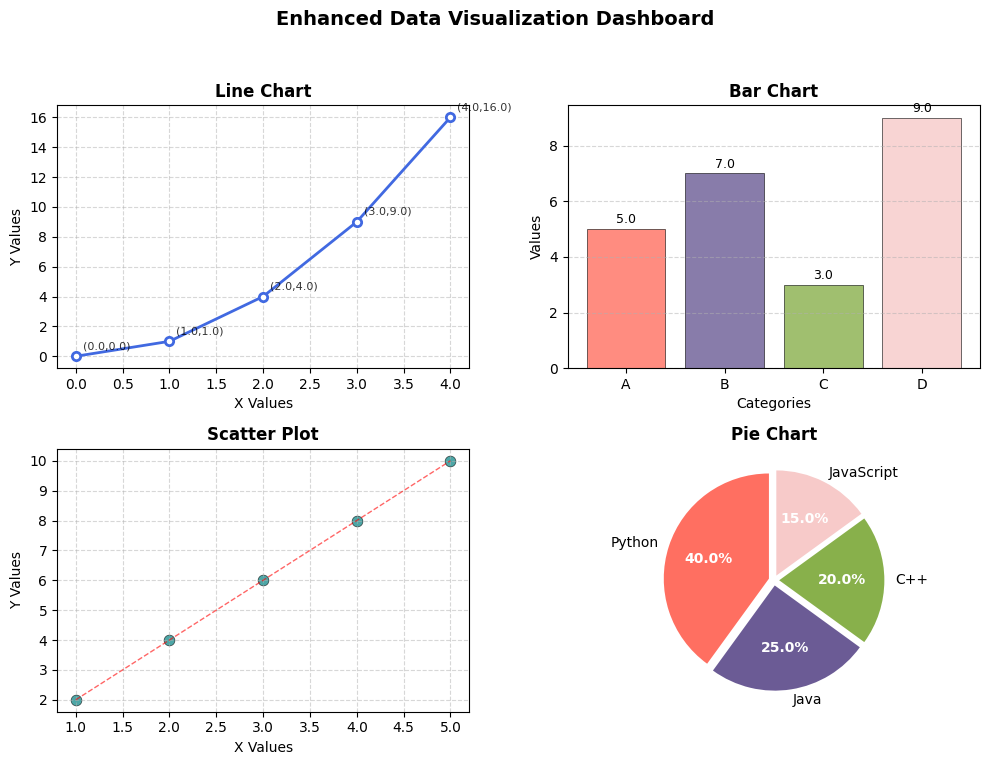


=== DATA SUMMARY ===
Line chart: 5 points, X range: 0.00 to 4.00
Bar chart: 4 categories, Value range: 3.00 to 9.00
Scatter plot: 5 points, Correlation: 1.000
Pie chart: 4 segments, Total: 100.0%
Plots created successfully!

TESTING ERROR HANDLING

Test: Empty data
Validating input data...
Validation Error: line_x cannot be empty

Test: Mismatched lengths
Validating input data...
Validation Error: Line chart: x and y data length mismatch (3 vs 2)

Test: None values
Validating input data...
Validation Error: Line chart: x and y data length mismatch (5 vs 3)

Test: Invalid figsize
Validation Error: figsize dimensions must be positive

Test: String in numeric data
Validating input data...
Validation Error: Cannot convert line_x to numeric array: could not convert string to float: 'invalid'

Test: Negative pie sizes
Validating input data...
Validation Error: Pie chart sizes cannot be negative

All tests completed!


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Union, Optional, Tuple

def validate_numeric_data(data: Union[List, np.ndarray], data_name: str) -> np.ndarray:
    """
    Validate and clean numeric data arrays.
    
    Parameters:
    -----------
    data : list or array-like
        Input data to validate
    data_name : str
        Name of the data for error messages
        
    Returns:
    --------
    np.ndarray : Cleaned numeric array
    """
    if data is None:
        raise ValueError(f"{data_name} cannot be None")
    
    if not isinstance(data, (list, tuple, np.ndarray)):
        raise TypeError(f"{data_name} must be list, tuple, or numpy array, got {type(data)}")
    
    if len(data) == 0:
        raise ValueError(f"{data_name} cannot be empty")
    
    try:
        # Convert to numpy array
        data_array = np.array(data, dtype=float)
        
        # Check for NaN or infinite values
        if np.any(np.isnan(data_array)):
            print(f"Warning: NaN values detected in {data_name}")
            data_array = data_array[~np.isnan(data_array)]
            if len(data_array) == 0:
                raise ValueError(f"No valid data remains in {data_name} after removing NaN values")
        
        if np.any(np.isinf(data_array)):
            print(f"Warning: Infinite values detected in {data_name}")
            data_array = data_array[~np.isinf(data_array)]
            if len(data_array) == 0:
                raise ValueError(f"No valid data remains in {data_name} after removing infinite values")
        
        return data_array
        
    except (ValueError, TypeError) as e:
        raise ValueError(f"Cannot convert {data_name} to numeric array: {e}")

def validate_categorical_data(categories: List[str], values: List[Union[int, float]]) -> Tuple[List[str], np.ndarray]:
    """
    Validate categorical data and corresponding values.
    
    Parameters:
    -----------
    categories : list of str
        Category labels
    values : list of numbers
        Corresponding values
        
    Returns:
    --------
    tuple : (categories, values_array)
    """
    if not categories or not values:
        raise ValueError("Categories and values cannot be empty")
    
    if len(categories) != len(values):
        raise ValueError(f"Categories length ({len(categories)}) must match values length ({len(values)})")
    
    # Validate categories are strings
    if not all(isinstance(cat, str) for cat in categories):
        raise TypeError("All categories must be strings")
    
    # Validate values are numeric
    values_array = validate_numeric_data(values, "values")
    
    # Check for negative values in certain contexts
    if np.any(values_array < 0):
        print("Warning: Negative values detected in categorical data")
    
    return categories, values_array

def create_enhanced_subplots(line_x=None, line_y=None, 
                           bar_categories=None, bar_values=None,
                           scatter_x=None, scatter_y=None,
                           pie_labels=None, pie_sizes=None,
                           figsize=(10, 8), colors=None):
    """
    Create a 2x2 subplot with comprehensive error handling and validation.
    
    Parameters:
    -----------
    line_x, line_y : array-like
        Data for line chart
    bar_categories : list of str
        Categories for bar chart
    bar_values : array-like
        Values for bar chart
    scatter_x, scatter_y : array-like
        Data for scatter plot
    pie_labels : list of str
        Labels for pie chart
    pie_sizes : array-like
        Sizes for pie chart
    figsize : tuple
        Figure size
    colors : list of str
        Color palette
        
    Returns:
    --------
    bool : Success status
    """
    
    try:
        # Default data if none provided
        if line_x is None:
            line_x = [0, 1, 2, 3, 4]
        if line_y is None:
            line_y = [i ** 2 for i in line_x]
        if bar_categories is None:
            bar_categories = ['A', 'B', 'C', 'D']
        if bar_values is None:
            bar_values = [5, 7, 3, 9]
        if scatter_x is None:
            scatter_x = [1, 2, 3, 4, 5]
        if scatter_y is None:
            scatter_y = [2, 4, 6, 8, 10]
        if pie_labels is None:
            pie_labels = ['Python', 'Java', 'C++', 'JavaScript']
        if pie_sizes is None:
            pie_sizes = [40, 25, 20, 15]
        if colors is None:
            colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']
        
        # Validate figsize
        if not isinstance(figsize, (tuple, list)) or len(figsize) != 2:
            raise ValueError("figsize must be a tuple or list of length 2")
        if figsize[0] <= 0 or figsize[1] <= 0:
            raise ValueError("figsize dimensions must be positive")
        
        # Data validation
        print("Validating input data...")
        
        # Line chart data validation
        line_x_clean = validate_numeric_data(line_x, "line_x")
        line_y_clean = validate_numeric_data(line_y, "line_y")
        if len(line_x_clean) != len(line_y_clean):
            raise ValueError(f"Line chart: x and y data length mismatch ({len(line_x_clean)} vs {len(line_y_clean)})")
        
        # Bar chart data validation
        bar_categories_clean, bar_values_clean = validate_categorical_data(bar_categories, bar_values)
        
        # Scatter plot data validation
        scatter_x_clean = validate_numeric_data(scatter_x, "scatter_x")
        scatter_y_clean = validate_numeric_data(scatter_y, "scatter_y")
        if len(scatter_x_clean) != len(scatter_y_clean):
            raise ValueError(f"Scatter plot: x and y data length mismatch ({len(scatter_x_clean)} vs {len(scatter_y_clean)})")
        
        # Pie chart data validation
        pie_labels_clean, pie_sizes_clean = validate_categorical_data(pie_labels, pie_sizes)
        
        # Pie chart specific validations
        if np.any(pie_sizes_clean < 0):
            raise ValueError("Pie chart sizes cannot be negative")
        
        # Check if pie sizes sum to reasonable value (warn if not 100%)
        pie_total = np.sum(pie_sizes_clean)
        if abs(pie_total - 100) > 1:  # Allow small floating point errors
            print(f"Warning: Pie chart sizes sum to {pie_total}%, not 100%")
        
        # Color validation
        if len(colors) < len(bar_categories_clean):
            print(f"Warning: Not enough colors provided ({len(colors)}), using default colors")
            colors = plt.cm.Set3(np.linspace(0, 1, len(bar_categories_clean)))
        
        print("All data validated successfully!")
        
        # Create subplots
        fig, axs = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle('Enhanced Data Visualization Dashboard', fontsize=14, fontweight='bold')
        
        # 1. Line Chart (Top Left)
        try:
            axs[0, 0].plot(line_x_clean, line_y_clean, color='royalblue', marker='o', 
                          linewidth=2, markersize=6, markerfacecolor='white', 
                          markeredgecolor='royalblue', markeredgewidth=2)
            axs[0, 0].set_title('Line Chart', fontweight='bold')
            axs[0, 0].set_xlabel('X Values')
            axs[0, 0].set_ylabel('Y Values')
            axs[0, 0].grid(True, linestyle='--', alpha=0.5)
            
            # Add data point annotations
            for i, (x, y) in enumerate(zip(line_x_clean[:5], line_y_clean[:5])):  # Limit annotations
                axs[0, 0].annotate(f'({x:.1f},{y:.1f})', (x, y), 
                                  xytext=(5, 5), textcoords='offset points', 
                                  fontsize=8, alpha=0.8)
        except Exception as e:
            print(f"Error creating line chart: {e}")
            axs[0, 0].text(0.5, 0.5, 'Line Chart\nError', ha='center', va='center', 
                          transform=axs[0, 0].transAxes, fontsize=12)
        
        # 2. Bar Chart (Top Right)
        try:
            bars = axs[0, 1].bar(bar_categories_clean, bar_values_clean, color=colors[:len(bar_categories_clean)],
                                edgecolor='black', linewidth=0.5, alpha=0.8)
            axs[0, 1].set_title('Bar Chart', fontweight='bold')
            axs[0, 1].set_xlabel('Categories')
            axs[0, 1].set_ylabel('Values')
            axs[0, 1].grid(axis='y', linestyle='--', alpha=0.5)
            
            # Add value labels on bars
            for bar, value in zip(bars, bar_values_clean):
                height = bar.get_height()
                axs[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                              f'{value:.1f}', ha='center', va='bottom', fontsize=9)
        except Exception as e:
            print(f"Error creating bar chart: {e}")
            axs[0, 1].text(0.5, 0.5, 'Bar Chart\nError', ha='center', va='center', 
                          transform=axs[0, 1].transAxes, fontsize=12)
        
        # 3. Scatter Plot (Bottom Left)
        try:
            scatter = axs[1, 0].scatter(scatter_x_clean, scatter_y_clean, color='teal', 
                                       s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
            axs[1, 0].set_title('Scatter Plot', fontweight='bold')
            axs[1, 0].set_xlabel('X Values')
            axs[1, 0].set_ylabel('Y Values')
            axs[1, 0].grid(True, linestyle='--', alpha=0.5)
            
            # Add trend line if data is suitable
            if len(scatter_x_clean) > 1:
                z = np.polyfit(scatter_x_clean, scatter_y_clean, 1)
                p = np.poly1d(z)
                axs[1, 0].plot(scatter_x_clean, p(scatter_x_clean), "r--", alpha=0.6, linewidth=1)
        except Exception as e:
            print(f"Error creating scatter plot: {e}")
            axs[1, 0].text(0.5, 0.5, 'Scatter Plot\nError', ha='center', va='center', 
                          transform=axs[1, 0].transAxes, fontsize=12)
        
        # 4. Pie Chart (Bottom Right)
        try:
            wedges, texts, autotexts = axs[1, 1].pie(pie_sizes_clean, labels=pie_labels_clean, 
                                                    autopct='%1.1f%%', startangle=90,
                                                    colors=colors[:len(pie_labels_clean)],
                                                    explode=[0.05] * len(pie_labels_clean))
            axs[1, 1].set_title('Pie Chart', fontweight='bold')
            
            # Enhance text readability
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
        except Exception as e:
            print(f"Error creating pie chart: {e}")
            axs[1, 1].text(0.5, 0.5, 'Pie Chart\nError', ha='center', va='center', 
                          transform=axs[1, 1].transAxes, fontsize=12)
        
        # Improve layout and display
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
        plt.show()
        
        # Print summary statistics
        print("\n=== DATA SUMMARY ===")
        print(f"Line chart: {len(line_x_clean)} points, X range: {np.min(line_x_clean):.2f} to {np.max(line_x_clean):.2f}")
        print(f"Bar chart: {len(bar_categories_clean)} categories, Value range: {np.min(bar_values_clean):.2f} to {np.max(bar_values_clean):.2f}")
        print(f"Scatter plot: {len(scatter_x_clean)} points, Correlation: {np.corrcoef(scatter_x_clean, scatter_y_clean)[0,1]:.3f}")
        print(f"Pie chart: {len(pie_labels_clean)} segments, Total: {np.sum(pie_sizes_clean):.1f}%")
        print("Plots created successfully!")
        
        return True
        
    except ValueError as ve:
        print(f"Validation Error: {ve}")
        return False
    except TypeError as te:
        print(f"Type Error: {te}")
        return False
    except Exception as e:
        print(f"Unexpected error: {e}")
        return False
    finally:
        # Clean up any partial plots
        if 'fig' in locals():
            plt.close(fig)

# Example usage with original data
if __name__ == "__main__":
    print("Creating enhanced subplot visualization...")
    
    # Test with original data
    success = create_enhanced_subplots()
    
    print("\n" + "="*50)
    print("TESTING ERROR HANDLING")
    print("="*50)
    
    # Test various error conditions
    test_cases = [
        ("Empty data", lambda: create_enhanced_subplots(line_x=[], line_y=[])),
        ("Mismatched lengths", lambda: create_enhanced_subplots(line_x=[1,2,3], line_y=[1,2])),
        ("None values", lambda: create_enhanced_subplots(line_x=None, line_y=[1,2,3])),
        ("Invalid figsize", lambda: create_enhanced_subplots(figsize=(0, 5))),
        ("String in numeric data", lambda: create_enhanced_subplots(line_x=[1,2,'invalid'], line_y=[1,2,3])),
        ("Negative pie sizes", lambda: create_enhanced_subplots(pie_sizes=[10, -5, 20, 15])),
    ]
    
    for test_name, test_func in test_cases:
        print(f"\nTest: {test_name}")
        try:
            test_func()
        except Exception as e:
            print(f"Caught expected error: {e}")
    
    print("\nAll tests completed!")